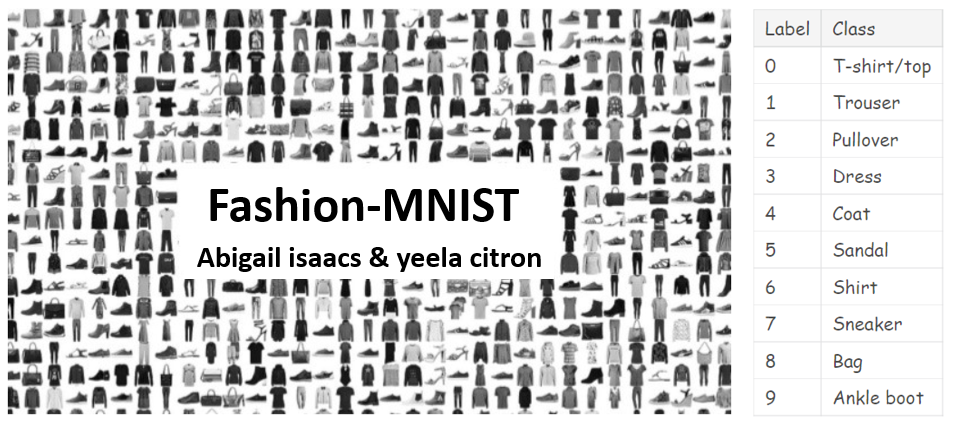

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
import random
from sklearn.dummy import DummyClassifier
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline 
from sklearn.cluster import KMeans
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time
from sklearn.manifold import TSNE 
import seaborn as sb
import matplotlib.patheffects as pe
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
fm_train = pd.read_csv(r"C:\Users\USER\Desktop\yeela_data_science\fashion-mnist_train.csv")

In [27]:
fm_train = pd.read_csv(r"C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\fashion-mnist_train.csv")
fm_test = pd.read_csv(r"C:\\Users\\abiis\\OneDrive\\שולחן העבודה\\מדעי הנתונים\\fashion-mnist_test.csv")
fm_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fm_train_copy= fm_train.copy(deep=True)

In [6]:
fm_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [8]:
train_labels = np.array(fm_train.label)
test_labels = np.array(fm_test.label)

In [31]:
fm_test.drop('label',axis=1, inplace=True)
fm_train.drop('label',axis=1, inplace=True)

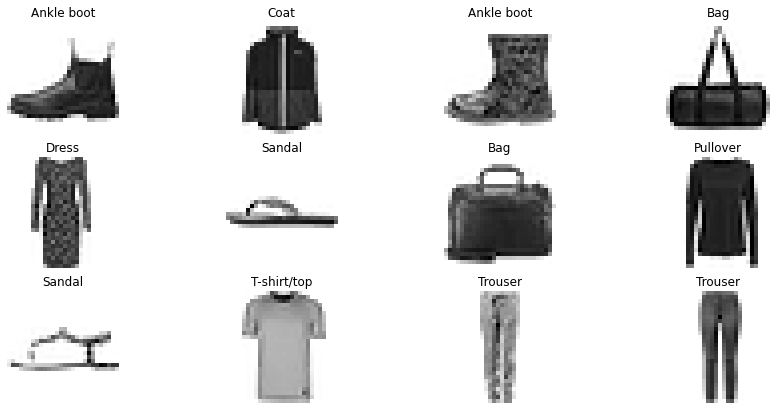

In [45]:
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
train_data = np.array(fm_train).reshape(fm_train.shape[0],28,28,1)

plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[train_labels[rand_index]])

# Models

### Dummy model

In [46]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(fm_train, train_labels)
dummy_clf.score(fm_test, test_labels)

0.1

### KNN model

In [50]:
# search for an optimal value of K for KNN
kf = KFold(n_splits=10, random_state=2, shuffle=True)

k_range = list(range(1, 20))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, fm_train, train_labels, cv=kf, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.8508666666666667, 0.8499500000000001, 0.85585, 0.8574666666666666, 0.8569333333333333, 0.8574333333333334, 0.8562166666666666, 0.85645, 0.8540166666666666, 0.8551, 0.8529, 0.8527333333333333, 0.8512166666666667, 0.8509500000000001, 0.8492166666666666, 0.8493999999999999, 0.8481333333333334, 0.84805, 0.8463500000000002]


Text(0, 0.5, 'Cross-Validated Accuracy')

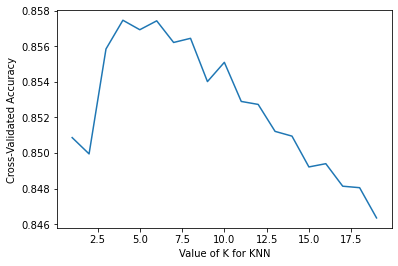

In [51]:
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [52]:
op_k = k_scores.index(max(k_scores))+1
score_knn = k_scores[op_k]
print ("our optimal k =" + str(op_k))
print ("Accuracy best score =" + str(score_knn))

our optimal k =4
Accuracy best score =0.8569333333333333


### Random Forest Classifier

In [16]:
RFR = RandomForestClassifier()

In [54]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

scores_standardized = cross_val_score(RFR, fm_train, train_labels, cv=kf)

print("score:" +(str)(scores_standardized.mean()))

score:0.8814833333333333


### AdaBoost Classifier using Random Forest Classifier

In [9]:
y = np.array(fm_train_copy.label)
X = fm_train_copy.drop("label", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.05, random_state=1)

In [69]:
AdaModel = AdaBoostClassifier(base_estimator=RandomForestClassifier() , n_estimators= 100,learning_rate=1)
AdaModel = AdaModel.fit(X_train, y_train)
score = AdaModel.score(X_test, y_test)
score

0.8773333333333333

### Gradient Boosting Classifier

In [10]:
params = {
    "n_estimators": 500,
    "max_depth": 5,
    "min_samples_split": 5,
    "learning_rate": 0.1,
}

In [ ]:
model = GradientBoostingClassifier(**params)
model = model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

### Naive bayes classifier

In [67]:
model = GaussianNB()
model = model.fit(X_train, y_train)
score = model.score(X_test, y_test)
score

0.59

### Voting Classifier

In [88]:
models = list()
models.append(('lr', LogisticRegression()))
models.append(('ds', DecisionTreeClassifier()))
models.append(('knn', KNeighborsClassifier(n_neighbors=4)))
models.append(('rf', RandomForestClassifier()))
models

[('lr', LogisticRegression()),
 ('ds', DecisionTreeClassifier()),
 ('knn', KNeighborsClassifier(n_neighbors=4)),
 ('rf', RandomForestClassifier())]

In [89]:
kf = model_selection.KFold(n_splits=10, random_state=2, shuffle=True)

In [90]:
soft_Voting = VotingClassifier(estimators = models,voting ="soft")
hard_Voting = VotingClassifier(estimators = models,voting ="hard")

### Soft Voting

In [40]:
scores = model_selection.cross_val_score(soft_Voting, fm_train, train_labels, cv=kf, scoring='accuracy')
print(scores.mean())

0.8756166666666665


### Hard Voting

In [41]:
scores = model_selection.cross_val_score(hard_Voting, fm_train, train_labels, cv=kf, scoring='accuracy')
print(scores.mean())

0.88135


### KMeans using Logistic Regression

In [63]:
pipe  = Pipeline([
    ("KMeans",KMeans(n_clusters = 100)),
("lg",LogisticRegression())])

In [64]:
pipe.fit(X_train, y_train)

Pipeline(steps=[("KMeans",KMeans(n_clusters = 100)), ("lg",LogisticRegression())])
score = pipe.score(X_test, y_test)
score

0.759

### KMeans using SVC - Support Vector Classification

In [67]:
pipe  = Pipeline([
    ("KMeans",KMeans(n_clusters = 100)),
('svc', SVC())])

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[("KMeans",KMeans(n_clusters = 100)), ('svc', SVC())])
score = pipe.score(X_test, y_test)
score

0.8173333333333334

In [71]:
pipe  = Pipeline([
    ("KMeans",KMeans(n_clusters = 500)),
('svc', SVC())])

In [72]:
pipe.fit(X_train, y_train)

Pipeline(steps=[("KMeans",KMeans(n_clusters = 500)), ('svc', SVC())])
score = pipe.score(X_test, y_test)
score

0.826

# Pixel importances

In [ ]:
RFR.fit(X_train, y_train)
n_jobs = -1

data = fm_train
X, y = X_train, y_train

In [22]:
start_time = time.time()
img_shape = (28,28)

In [19]:
importances = RFR.feature_importances_
elapsed_time = time.time() - start_time

Elapsed time to compute the importances: 733.443 seconds


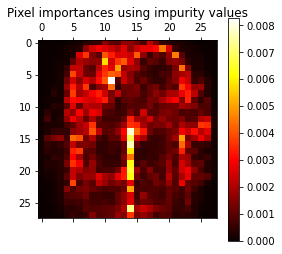

In [23]:
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

# T- SNE

In [47]:
X = np.vstack([fm_train[train_labels==i] for i in range(10)]) 
Y = np.hstack([train_labels[train_labels==i] for i in range(10)])

In [50]:
digits_final = TSNE(perplexity=30).fit_transform(X)

In [51]:
def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=5, c=palette[colors.astype(np.int)])
    # Add the labels for each digit.
    txts = []
     
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
       
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=1, foreground="w"), pe.Normal()])
        txts.append(txt)
   
    return f, ax, txts

(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(34.006767, 6.89823, '0'),
  Text(-32.958965, -34.403877, '1'),
  Text(-6.1868973, -14.667338, '2'),
  Text(31.287088, -21.997482, '3'),
  Text(1.0496213, -26.669514, '4'),
  Text(5.6974726, 28.150967, '5'),
  Text(5.2928104, -6.3394938, '6'),
  Text(20.396038, 33.8665, '7'),
  Text(-40.485832, 7.9173255, '8'),
  Text(-17.817337, 28.489693, '9')])

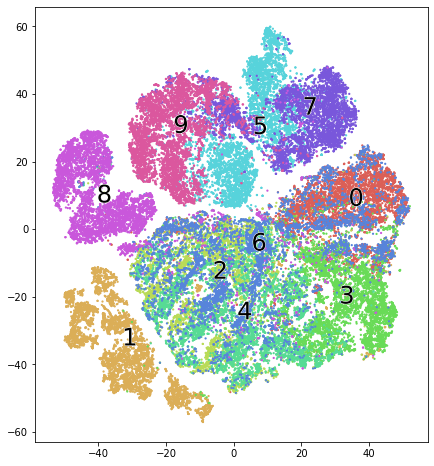

In [52]:
plot(digits_final,Y)

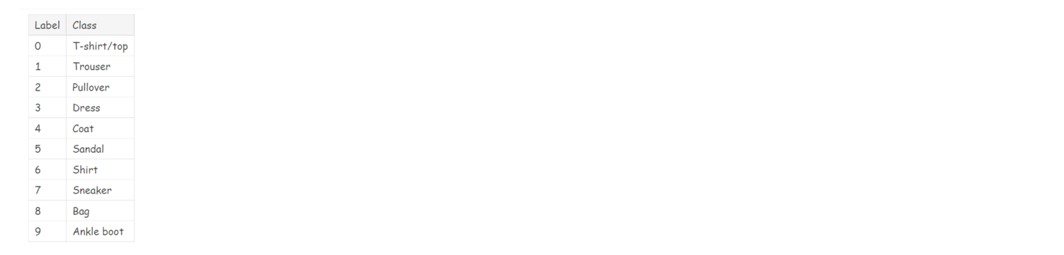

# PCA

In [32]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fm_train)
pca.explained_variance_ratio_

array([0.29011353, 0.17727668])

In [33]:
df_target = pd.DataFrame(train_labels)
df_target.rename({0: 'target'}, axis=1, inplace=True)

In [34]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(fm_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [35]:
finalDf = pd.concat([principalDf, df_target], axis = 1)

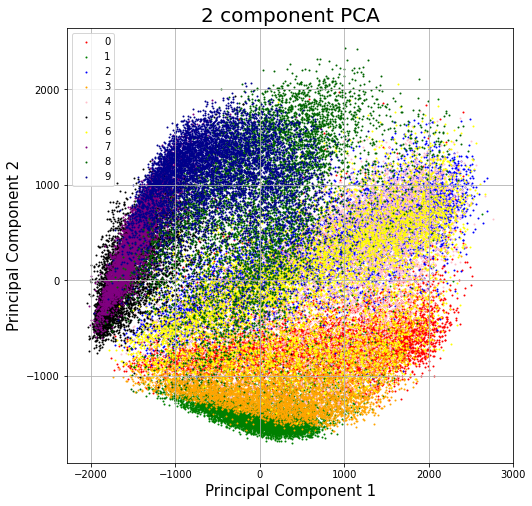

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2,3,4,5,6,7,8,9]
colors = ['red', 'green', 'blue','orange','pink','black','yellow','purple','darkgreen','darkblue','bordeaux']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 1)
ax.legend(targets)
ax.grid()

### As we can see two components explian only 0.46 from the data. We can see from the graph above that  two components are not enough to sparte the data in order to classifiy it.Therefore we need more components so that our model can preform well. 

### We are taking the random forest model and checking the scores and running time for different number of components,in order to see if fitting the data to the PCA will help us to achieve good scoure with low running time.

In [41]:
RFR = RandomForestClassifier()
 
kf = KFold(n_splits=5, random_state=42, shuffle=True)

#### Random forest without PCA

In [43]:
start_time = time.time()
scores_standardized = cross_val_score(RFR, fm_train, train_labels, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("running time: "+str(end_time-start_time))

score:0.8808333333333334
running time: 884.7248134613037


#### Random forest with PCA and 24 components

In [38]:
pca = PCA()
pca.fit_transform(fm_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d =np.argmax(cumsum >= 0.80)+1
print('number of Components we need in order to explain 80% of the data:'+str(d))

number of Components we need in order to explain 80% of the data:24


In [40]:
pca = PCA(0.80)
pca.fit_transform(fm_train)
train_pca24 = pca.transform(fm_train)
test_pca24 = pca.transform(fm_test)

In [42]:
start_time = time.time()

scores_standardized = cross_val_score(RFR, train_pca24, train_labels, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("running time: "+str(end_time-start_time))

score:0.8586166666666667
running time: 353.58906745910645


#### Random forest with PCA and 84 components

In [44]:
pca = PCA()
pca.fit_transform(fm_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d =np.argmax(cumsum >= 0.90)+1
print('number of Components we need in order to explain 90% of the data:'+str(d))

number of Components we need in order to explain 90% of the data:84


In [45]:
pca = PCA(0.90)
pca.fit_transform(fm_train)
train_pca84 = pca.transform(fm_train)
test_pca84 = pca.transform(fm_test)

In [46]:
start_time = time.time()

scores_standardized = cross_val_score(RFR, train_pca84, train_labels, cv=kf)
end_time = time.time()
print("score:" +(str)(scores_standardized.mean()))
print("running time: "+str(end_time-start_time))

score:0.8665499999999999
running time: 810.4613230228424


# PCA scores 

In [60]:
data  = {'Number of Components' :['Score','Time'],
         '784':[0.88, 884],
         '84': [0.866, 810],
         '24':[0.858, 353]
         }

data = pd.DataFrame(data) 
final_scores = data.set_index('Number of Components')
final_scores

,784,84,24
Number of Components,,,
Score,0.88,0.866,0.858
Time,884.00,810.000,353.000


### We found that it is possible to significantly reduce the number of features and by that reduce the running time  significantly and still remain with good enough scores.

# Table of scores

In [13]:
data  = {'models' :['accurecy'],
         'Dummy':[0.1],
         'KNN': [0.856],
         'Random Forest':[0.881],
         'AbaBoost RF':[0.877],
         'Naive bayes':[0.59],
         'Soft Voting':[0.875],
         'Hard Voting':[0.881],
         'KMeans LR K=100':[0.759],
         'KMeans SVC K=100':[0.817],
         'KMeans SVC K=500':[0.826],
         }

data = pd.DataFrame(data) 
final_scores = data.set_index('models')
final_scores

,Dummy,KNN,Random Forest,AbaBoost RF,Naive bayes,Soft Voting,Hard Voting,KMeans LR K=100,KMeans SVC K=100,KMeans SVC K=500
models,,,,,,,,,,
accurecy,0.1,0.856,0.881,0.877,0.59,0.875,0.881,0.759,0.817,0.826


# Testing the best models

### Random Forest

In [85]:
RFR.fit(fm_train, train_labels)

score = RFR.score(fm_test, test_labels)

print("score:" +(str)(score))

score:0.8848


### Hard Voting

In [91]:
hard_Voting.fit(fm_train, train_labels)
score = hard_Voting.score(fm_test, test_labels)

print("score:" +(str)(score))

score:0.8854


#  Summary 

We got simller scores to what we received in the training session.
Two main reasons for this are:
1) our data is large and varied.

2) our models are based on Ensamble-Learning which prevents "over-fitting", as we learned in class each "small model" balances the other).

In addition, we learned and experimented a new and important model - SVC- Support Vector Classification.
The model classifies the data by finding an optimal treshholed while he ignores outlyers.